<a href="https://colab.research.google.com/github/ChristopherZimmerCU-Boulder/projects/blob/master/TF_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM model using TensorFlow

### Import the data

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Culminating Experience/HandTagged_for_GoogleColab.csv')

### Label Encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# data['Sentiment'] = le.fit_transform(data['Sentiment'])

### Building the Training and Testing sets

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import math
training_size = math.floor(0.9*len(data['Comment']))

vocab_size = 10000
embedding_dim = 16
max_length = 20
trunc_type = 'post'
padding_type='post'
oov_tok = "<OOV>"

# Sentences
training_sentences = data['Comment'][0:training_size].values.tolist()
testing_sentences = data['Comment'][training_size:].values.tolist()

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


# Labels
labels = data['Sentiment'].values.tolist()
training_labels = data['Sentiment'][0:training_size].values.tolist()
testing_labels = data['Sentiment'][training_size:].values.tolist()

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(labels)
word_index2 = tokenizer2.word_index

training_labels = np.array(tokenizer2.texts_to_sequences(training_labels))
testing_labels = np.array(tokenizer2.texts_to_sequences(testing_labels))

### The Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 16)            160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 174,756
Trainable params: 174,756
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
96/96 [==============================] - 5s 24ms/step - loss: 1.2379 - accuracy: 0.4700 - val_loss: 1.1003 - val_accuracy: 0.2581
Epoch 2/50
96/96 [==============================] - 2s 16ms/step - loss: 0.8389 - accuracy: 0.6571 - val_loss: 0.7177 - val_accuracy: 0.7155
Epoch 3/50
96/96 [==============================] - 2s 16ms/step - loss: 0.5373 - accuracy: 0.7691 - val_loss: 0.6004 - val_accuracy: 0.7478
Epoch 4/50
96/96 [==============================] - 2s 16ms/step - loss: 0.4017 - accuracy: 0.8338 - val_loss: 0.6673 - val_accuracy: 0.7771
Epoch 5/50
96/96 [==============================] - 2s 17ms/step - loss: 0.3161 - accuracy: 0.8781 - val_loss: 0.7321 - val_accuracy: 0.7214
Epoch 6/50
96/96 [==============================] - 2s 17ms/step - loss: 0.2416 - accuracy: 0.9176 - val_loss: 0.7736 - val_accuracy: 0.7331
Epoch 7/50
96/96 [==============================] - 2s 17ms/step - loss: 0.2140 - accuracy: 0.9310 - val_loss: 0.9250 - val_accuracy: 0.7009
Epoch 8/50
96

### Graphical results

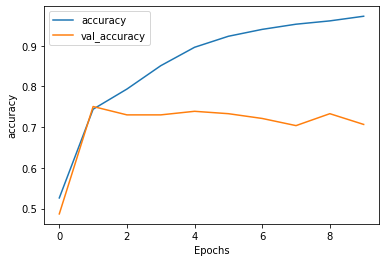

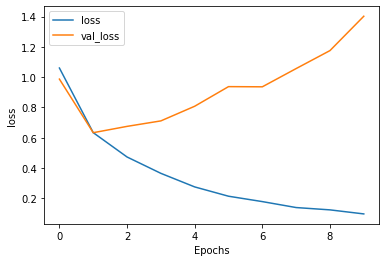

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')